In [20]:
import pandas as pd
from wordcloud import WordCloud
import gensim
import gensim.corpora as corpora
import operator
from nltk.corpus import stopwords
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
def make_bigrams(texts, bigram_mod):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts, bigram_mod, trigram_mod):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def visualise(lda_model, corpus, id2word):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
    pyLDAvis.display(vis)
import operator
def format_topics_sentences(ldamodel: gensim.models.LdaMulticore, corpus, texts, label):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = topic_names[topic_num]
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df.reset_index(drop=True), contents.reset_index(drop=True), pd.Series(label).reset_index(drop=True)], axis=1)
    return(sent_topics_df)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
train: pd.DataFrame = pd.read_csv('data/v10000000000.csv')
train = train.dropna(axis = 0, subset=['text'], inplace=False)
data = train['text'].values.tolist()
data_words = list(sent_to_words(data))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
data_words_bigrams = make_bigrams(data_words, bigram_mod)
data_words_trigrams = make_trigrams(data_words_bigrams, bigram_mod, trigram_mod)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
data_words_trigrams

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


rive',
  'multiple',
  'time',
  'daily',
  'thing',
  'love',
  'thing',
  'naturally',
  'source',
  'comply',
  'minor',
  'issue',
  'big',
  'issue',
  'emotional',
  'toll',
  'constantly',
  'remind',
  'cheat',
  'eye',
  'issue',
  'male',
  'acquaintance',
  'attach',
  'meeting',
  'girl',
  'friend',
  'month',
  'change',
  'plan',
  'abruptly',
  'inevitable',
  'circumstance',
  'constantly',
  'remind',
  'screw',
  'lead',
  'avoid',
  'friend',
  'spend',
  'majority',
  'time',
  'avoid',
  'unnecessary',
  'squabble',
  'thing',
  'affect',
  'relationship',
  'hand',
  'handful',
  'close',
  'female',
  'friend',
  'trust',
  'party',
  'drink',
  'tomorrow',
  'spare',
  'thought',
  'protect',
  'friendship',
  'laundering',
  'kind',
  'meet',
  'chitchat',
  'friend',
  'meetup',
  'month',
  'good',
  'amicable',
  'person',
  'poor',
  'temperament',
  'talks',
  'great',
  'value',
  'vision',
  'treat',
  'family',
  'curious',
  'partner',
  'drunk',
  'b

In [25]:
id2word = corpora.Dictionary(data_words_trigrams)
corpus = [id2word.doc2bow(text) for text in data_words_trigrams]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# lst = []
# for i in range(25, 31):
# ldamodel = gensim.models.LdaMulticore(corpus,num_topics=22, 
#                                             id2word=id2word,
#                                             random_state=100,
#                                             chunksize=100,
#                                             passes=10,
#                                             per_word_topics=True)
    # coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
    # coherence_lda = coherence_model_lda.get_coherence()
    # print('\nCoherence Score: ', coherence_lda)
    # lst += [(i, coherence_lda)]
# lst
ldamodel=gensim.models.ldamodel.LdaModel.load("topic/22topics/topic_model")
# ldamodel.save("topic_model")
print(ldamodel.print_topics(22))

[(0, '0.040*"people" + 0.023*"singapore" + 0.014*"lecturer" + 0.013*"comment" + 0.012*"post" + 0.011*"punishment" + 0.011*"write" + 0.010*"singaporeans" + 0.010*"situation" + 0.010*"submit"'), (1, '0.034*"parent" + 0.026*"pay" + 0.025*"money" + 0.024*"family" + 0.014*"work" + 0.012*"year" + 0.012*"buy" + 0.012*"child" + 0.011*"earn" + 0.011*"live"'), (2, '0.067*"female" + 0.029*"male" + 0.021*"round" + 0.020*"rare" + 0.019*"mm" + 0.018*"belong" + 0.017*"bio" + 0.017*"website" + 0.016*"capable" + 0.015*"delivery"'), (3, '0.018*"app" + 0.015*"people" + 0.011*"smart" + 0.011*"profile" + 0.010*"google" + 0.009*"success" + 0.007*"fat" + 0.007*"fast" + 0.007*"rate" + 0.007*"simple_stupid"'), (4, '0.074*"chinese" + 0.036*"driver" + 0.024*"sale" + 0.019*"medical" + 0.016*"medicine" + 0.015*"customer" + 0.013*"sector" + 0.012*"safety" + 0.012*"plain" + 0.010*"traineeship"'), (5, '0.041*"job" + 0.032*"work" + 0.031*"year" + 0.016*"pay" + 0.015*"graduate" + 0.014*"company" + 0.014*"time" + 0.012*

In [9]:
coherence_model_lda = gensim.models.CoherenceModel(model=ldamodel, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

Coherence Score:  0.48135575633497596


In [10]:
topics = format_topics_sentences(ldamodel, corpus, data, train['label'])
topics

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'topic_names' is not defined

In [16]:
topics.to_csv('topics.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
def format_topics(topic: list):
    # print(topics)
    for i in topic:
        print(i[0])
    for i in topic:
        topics = i[1].split(" + ")
        topics = [(word[word.index('"')+1:-1], float(word[:word.index('*')])) for word in topics]
        print(topics)
format_topics(ldamodel.print_topics(-1))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
[('people', 0.04), ('singapore', 0.023), ('lecturer', 0.014), ('comment', 0.013), ('post', 0.012), ('punishment', 0.011), ('write', 0.011), ('singaporeans', 0.01), ('situation', 0.01), ('submit', 0.01)]
[('parent', 0.034), ('pay', 0.026), ('money', 0.025), ('family', 0.024), ('work', 0.014), ('year', 0.012), ('buy', 0.012), ('child', 0.012), ('earn', 0.011), ('live', 0.011)]
[('female', 0.067), ('male', 0.029), ('round', 0.021), ('rare', 0.02), ('mm', 0.019), ('belong', 0.018), ('bio', 0.017), ('website', 0.017), ('capable', 0.016), ('delivery', 0.015)]
[('app', 0.018), ('people', 0.015), ('smart', 0.011), ('profile', 0.011), ('google', 0.01), ('success', 0.009), ('fat', 0.007), ('fast', 0.007), ('rate', 0.007), ('simple_stupid', 0.007)]
[('chinese', 0.074), ('driver', 0.036), ('sale', 0.024), ('medical', 0.019), ('medicine', 0.016), ('customer', 0.015), ('sector', 0.013), ('safety', 0.012), ('plain', 0.012), ('traineeship', 0.01)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-9913fc68b617>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_name==topic_names[(1,6,15,17,18)[i]], 'word'], rotation=30, horizontalalignment= 'right')


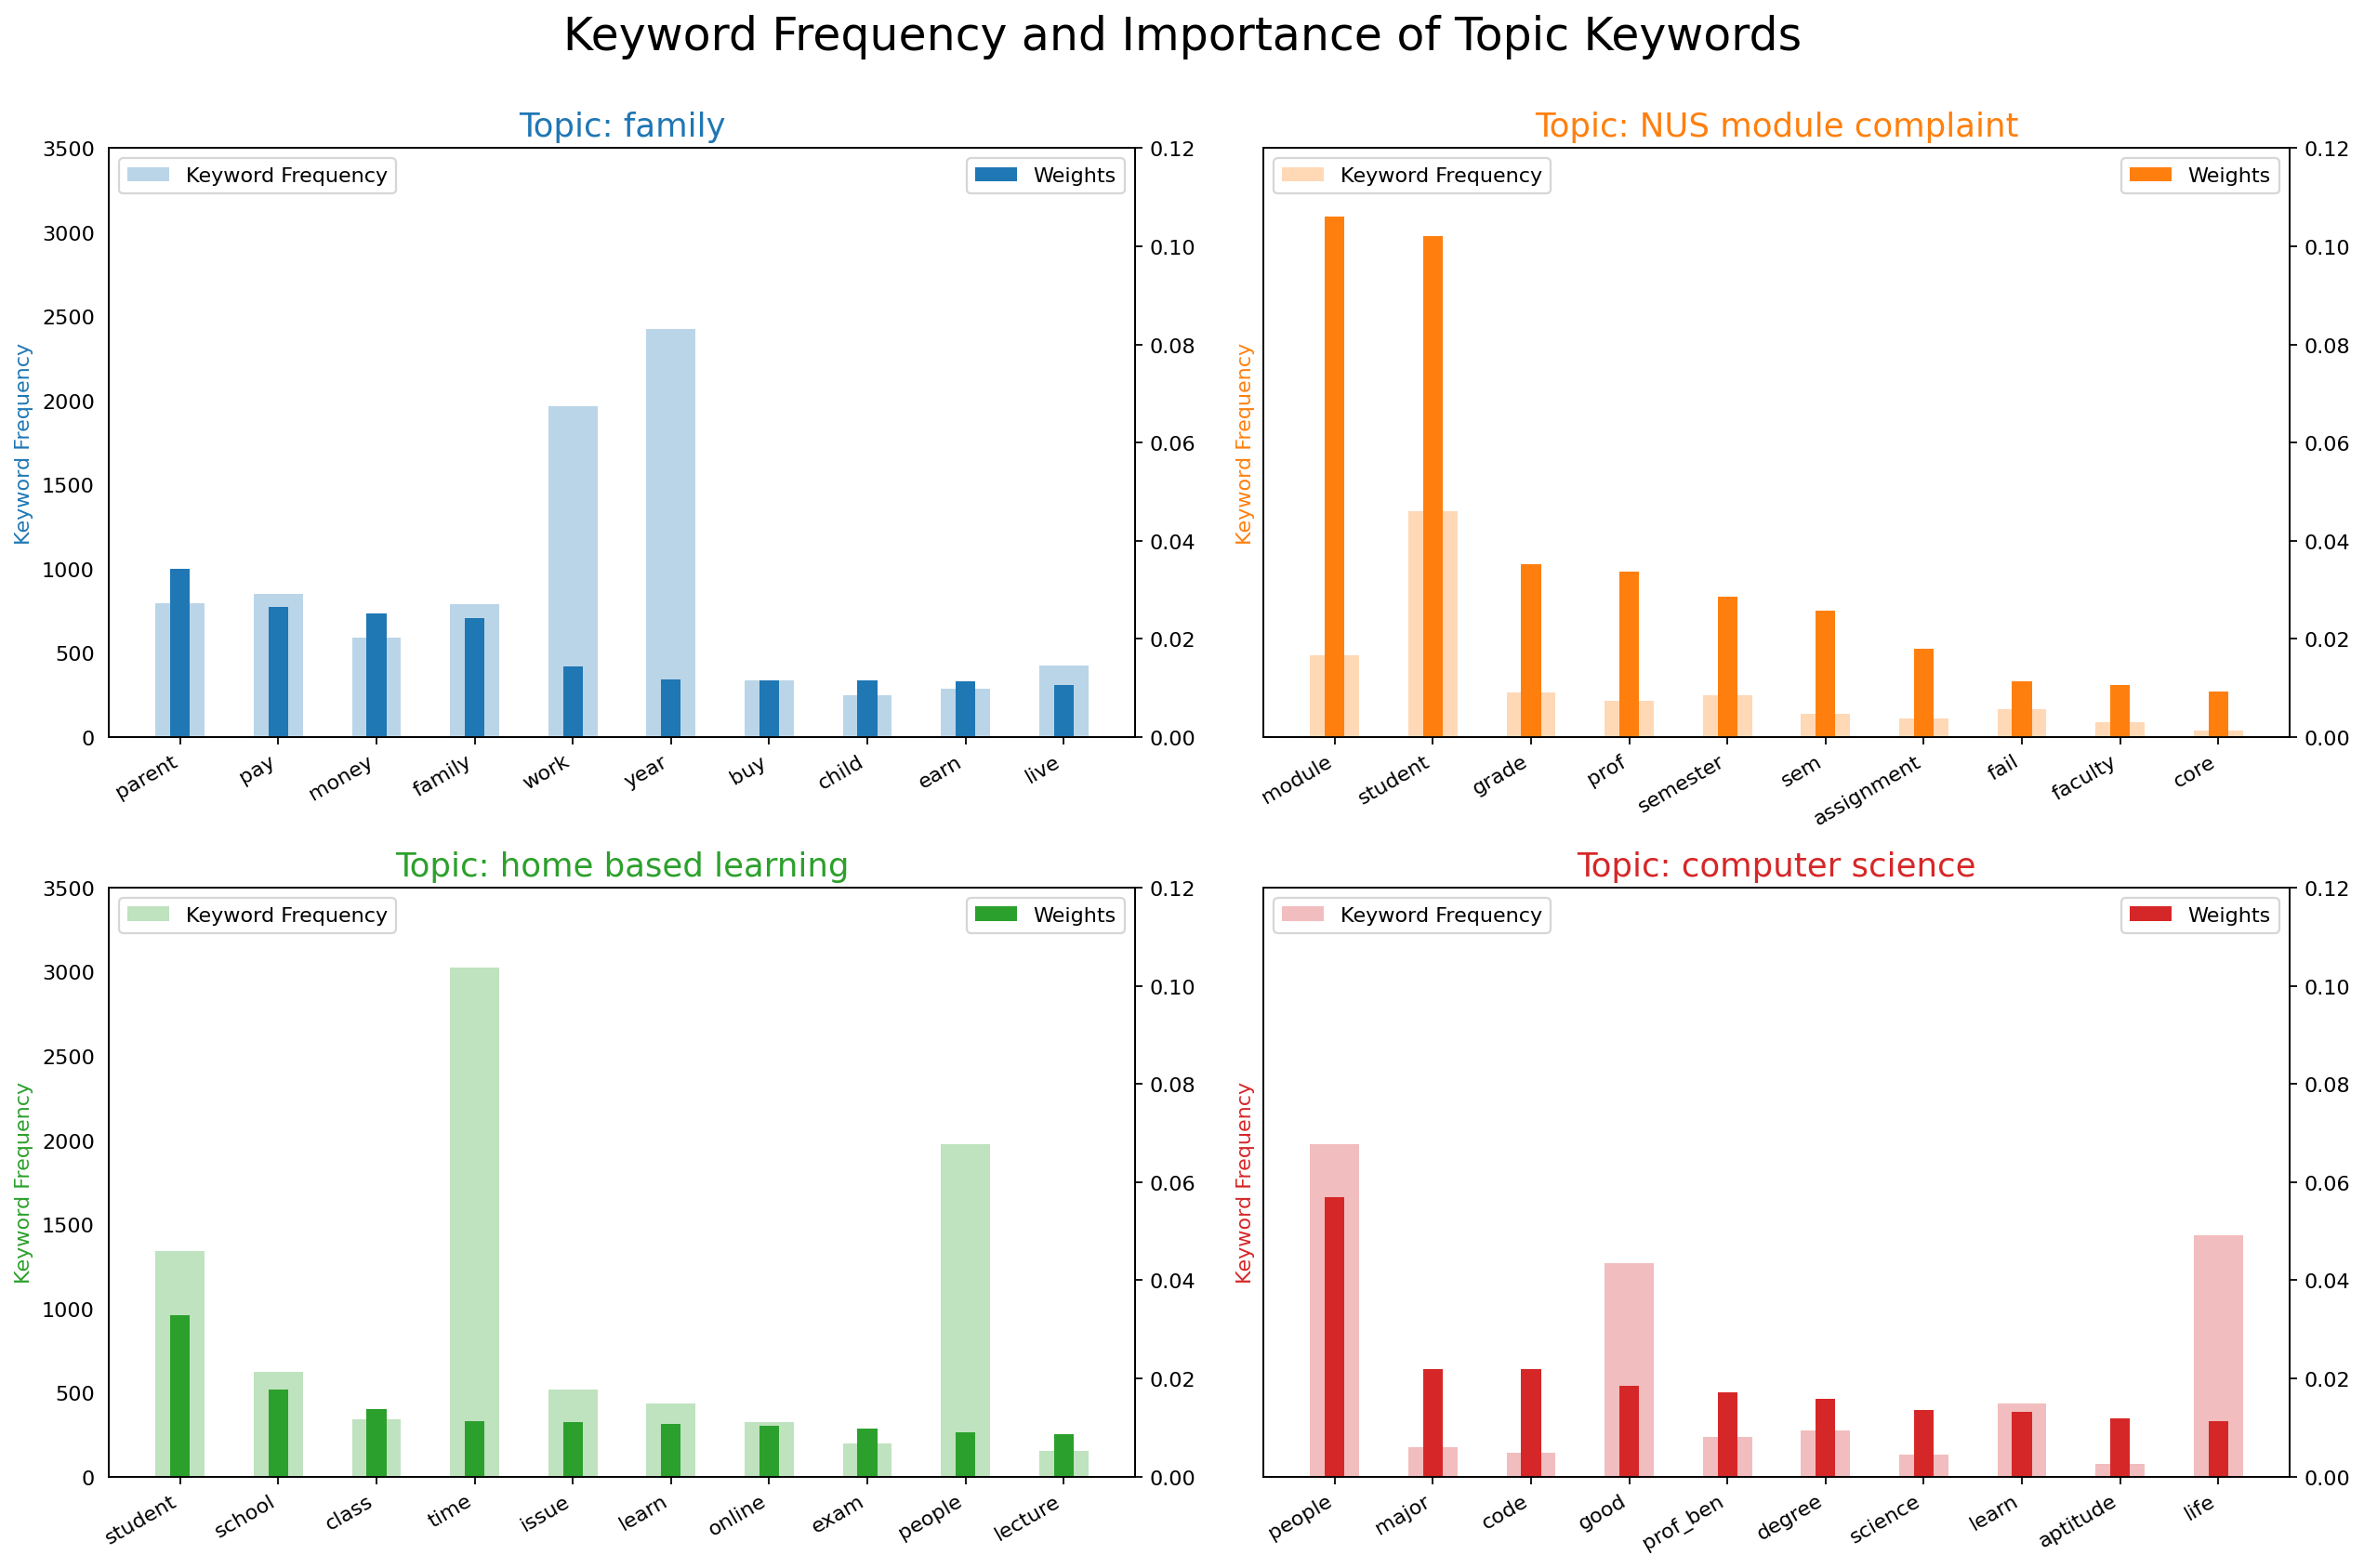

In [36]:
from collections import Counter
import matplotlib.colors as mcolors
topics = ldamodel.show_topics(-1, formatted=False)
data_flat = [w for w_list in data_words_trigrams for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    if i in (1,6,15,17,18): 
        for word, weight in topic:
            out.append([word, topic_names[i] , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_name', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_name==topic_names[(1,6,15,17,18)[i]], :], color=cols[i], width=0.5, alpha=0.3, label='Keyword Frequency')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_name==topic_names[(1,6,15,17,18)[i]], :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Keyword Frequency', color=cols[i])
    ax_twin.set_ylim(0, 0.12); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + topic_names[(1,6,15,17,18)[i]], color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_name==topic_names[(1,6,15,17,18)[i]], 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Keyword Frequency and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.savefig('topic/topic1.png')


In [27]:
topic_names = ['singapore',
'family',
'perosnal profiles online',
'self-doubt',
'internships and jobs',
'fresh grad job related woes',
'NUS module complaint',
'faculties and degrees',
'social media',
'jobs',
'pharmacy',
'happenings in hall',
'jobs',
'math faculty/degree',
'holidays',
'home based learning',
'current affairs',
'computer science',
'relationship',
'relationships after graduation',
'relationship',
'food/fashion']

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
vis

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20     0.310522  0.095676       1        1  28.299304
19     0.255928  0.103965       2        1  14.793364
5      0.232067 -0.174167       3        1  10.790619
1      0.226642 -0.003574       4        1   9.769529
15     0.192993 -0.133703       5        1   8.060870
18     0.207919  0.123321       6        1   7.185343
17     0.055502 -0.178132       7        1   2.375738
21     0.031003  0.025421       8        1   2.359902
3      0.023258  0.000089       9        1   2.346582
8     -0.000386  0.142354      10        1   2.141287
6     -0.053289 -0.209281      11        1   1.795048
11    -0.017860  0.151411      12        1   1.714811
0     -0.056484 -0.007024      13        1   1.545169
10    -0.098838 -0.018755      14        1   1.146791
12    -0.154267  0.030302      15        1   0.918259
13    -0.149522 -0.001278      16        1   0.882111
9     -0.118822 -0.035442      17        1   0.727212
14    -0.176396  0.028231      18        1   0.722397
7     -0.160748  0.001068      19        1   0.718713
4     -0.176591  0.003318      20        1   0.696084
2     -0.185599  0.033485      21        1   0.567567
16    -0.187032  0.022715      22        1   0.443300, topic_info=          Term         Freq        Total Category  logprob  loglift
7         girl  1892.000000  1892.000000  Default  30.0000  30.0000
8          guy  2085.000000  2085.000000  Default  29.0000  29.0000
184    student  1364.000000  1364.000000  Default  28.0000  28.0000
20      people  2115.000000  2115.000000  Default  27.0000  27.0000
11         job  1167.000000  1167.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
4813     hotel    14.553895    36.186182  Topic22  -4.2664   4.5079
4129  incoming     7.202472    13.178683  Topic22  -4.9698   4.8145
4815       raw     6.056164    10.999895  Topic22  -5.1432   4.8219
2387   reserve     6.691793    16.619863  Topic22  -5.0434   4.5090
1834      half     8.219091   162.982864  Topic22  -4.8378   2.4315

[1278 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1669     15  0.974764   abortion
2475     18  0.953028   absolute
4913     16  0.968027    abusive
3961      7  0.951535   academia
4293     10  0.982219  accompany
...     ...       ...        ...
1512      4  0.078260    youtube
1512      5  0.886945    youtube
4164     16  0.978372       zone
4165     16  0.936691     zoning
4316      5  0.986333       zoom

[2777 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 20, 6, 2, 16, 19, 18, 22, 4, 9, 7, 12, 1, 11, 13, 14, 10, 15, 8, 5, 3, 17])

In [35]:
pyLDAvis.save_html(vis, 'lda.html')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
num_nnz, data, indices, indptr = 0, [], [], [0]
for docno, doc in enumerate(corpus):
            # zip(*doc) transforms doc to (token_indices, token_counts]
            doc_indices, doc_data = zip(*doc) if doc else ([], [])
            indices.extend(doc_indices)
            data.extend(doc_data)
            num_nnz += len(doc)
            indptr.append(num_nnz)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
import scipy
import numpy as np
num_terms=len(id2word)
num_docs = len(indptr) - 1
# now num_docs, num_terms and num_nnz contain the correct values
data = np.asarray(data, dtype=None)
indices = np.asarray(indices)
result = scipy.sparse.csc_matrix((data, indices, indptr), shape=(num_terms, num_docs), dtype=None)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
